# Final Project

### 獲取歷史資料

In [2]:
from finlab.data import Data

data = Data()

rev = data.get("當月營收")
#close = data.get("收盤價")
close = data.get_adj("收盤價")

rev.index = rev.index.shift(5, "d")

D:\python上課\finlab_II\finlab\data.py:103: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead.
  all_index = (df.index | item.index).sort_values()
D:\python上課\finlab_II\finlab\data.py:103: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead.
  all_index = (df.index | item.index).sort_values()
D:\python上課\finlab_II\finlab\data.py:103: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead.
  all_index = (df.index | item.index).sort_values()
D:\python上課\finlab_II\finlab\data.py:103: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use 

In [3]:
close

stock_id,0015,0050,0051,0052,0053,0054,0055,0056,0057,0058,...,9944,9945,9946,9949,9950,9951,9955,9958,9960,9962
date,,,,,,,,,,,,,,,,,,,,,
2007-04-23,9.54,57.850000,32.830000,38.400000,NaN,NaN,NaN,NaN,NaN,NaN,...,31.000000,30.350000,9.780000,73.600000,13.25000,51.300000,72.400000,NaN,46.000000,49.600000
2007-04-24,9.54,58.100000,32.990000,38.650000,NaN,NaN,NaN,NaN,NaN,NaN,...,32.000000,30.500000,9.910000,75.000000,13.25000,50.500000,71.600000,NaN,45.900000,50.400000
2007-04-25,9.52,57.600000,32.800000,38.590000,NaN,NaN,NaN,NaN,NaN,NaN,...,32.300000,29.500000,10.100000,74.600000,13.30000,49.900000,71.600000,NaN,49.100000,49.100000
2007-04-26,9.59,57.700000,32.800000,38.600000,NaN,NaN,NaN,NaN,NaN,NaN,...,31.600000,29.150000,10.800000,74.500000,13.25000,49.500000,71.000000,NaN,48.900000,48.000000
2007-04-27,9.55,57.500000,32.720000,38.400000,NaN,NaN,NaN,NaN,NaN,NaN,...,31.400000,28.500000,11.550000,75.700000,13.15000,48.800000,69.500000,NaN,48.600000,46.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-12,NaN,191.735466,81.762758,161.053309,80.624068,NaN,31.499743,50.422639,84.518694,NaN,...,34.337677,137.738615,25.720262,NaN,19.54670,135.746315,26.530153,131.285012,71.539091,36.202948
2022-12-13,NaN,190.893782,81.762758,160.307308,80.105823,NaN,31.485267,50.481960,83.998259,NaN,...,34.506412,138.049187,25.826107,26.516825,19.54670,134.721040,26.657396,130.541609,71.269132,37.330766
2022-12-14,NaN,193.250496,82.857097,162.711089,81.290382,NaN,31.702407,50.778564,85.091173,NaN,...,34.590780,139.757332,26.249486,26.951527,20.18908,135.541260,27.039124,134.258625,71.269132,37.556329


### 計算features

In [4]:
def bias(n):
    return close / close.rolling(n, min_periods=1).mean()

def acc(n):
    return close.shift(n) / (close.shift(2*n) + close) * 2

def rsv(n):
    l = close.rolling(n, min_periods=1).min()
    h = close.rolling(n, min_periods=1).max()
    
    return (close - l) / (h - l)

def mom(n):
    return (rev / rev.shift(1)).shift(n)

features = {
    'mom1': mom(1),
    'mom2': mom(2),
    'mom3': mom(3),
    'mom4': mom(4),
    'mom5': mom(5),
    'mom6': mom(6),
    'mom7': mom(7),
    'mom8': mom(8),
    'mom9': mom(9),
    
    'bias5': bias(5),
    'bias10': bias(10),
    'bias20': bias(20),
    'bias60': bias(60),
    'bias120': bias(120),
    'bias240': bias(240),
    
    'acc5': acc(5),
    'acc10': acc(10),
    'acc20': acc(20),
    'acc60': acc(60),
    'acc120': acc(120),
    'acc240': acc(240),
    
    'rsv5': rsv(5),
    'rsv10': rsv(10),
    'rsv20': rsv(20),
    'rsv60': rsv(60),
    'rsv120': rsv(120),
    'rsv240': rsv(240),
}


### 製作dataset

##### 設定買賣頻率

In [5]:
every_month = rev.index
every_month

DatetimeIndex(['2005-02-15', '2005-03-15', '2005-04-15', '2005-05-15',
               '2005-06-15', '2005-07-15', '2005-08-15', '2005-09-15',
               '2005-10-15', '2005-11-15',
               ...
               '2022-03-15', '2022-04-15', '2022-05-15', '2022-06-15',
               '2022-07-15', '2022-08-15', '2022-09-15', '2022-10-15',
               '2022-11-15', '2022-12-15'],
              dtype='datetime64[ns]', name='date', length=215, freq=None)

##### 將dataframe 組裝起來

In [6]:
# features['bias20'].reindex(every_month, method='ffill')

for name, f in features.items():
    features[name] = f.reindex(every_month, method='ffill')

In [7]:

for name, f in features.items():
    features[name] = f.unstack()

In [8]:
import pandas as pd
dataset = pd.DataFrame(features)

In [9]:
feature_names = list(dataset.columns)

### 新增 label

In [10]:
from finlab import ml

ml.add_profit_prediction(dataset)
ml.add_rank_prediction(dataset)

D:\python上課\finlab_II\finlab\data.py:103: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead.
  all_index = (df.index | item.index).sort_values()
D:\python上課\finlab_II\finlab\data.py:103: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead.
  all_index = (df.index | item.index).sort_values()
D:\python上課\finlab_II\finlab\data.py:103: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead.
  all_index = (df.index | item.index).sort_values()
D:\python上課\finlab_II\finlab\data.py:103: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use 

### 刪除太大太小的歷史資料

In [11]:
print(dataset.shape)

def drop_extreme_case(dataset, feature_names, thresh=0.01):
    
    extreme_cases = pd.Series(False, index=dataset.index)
    for f in feature_names:
        tf = dataset[f]
        extreme_cases = extreme_cases | (tf < tf.quantile(thresh)) | (tf > tf.quantile(1-thresh))
    dataset = dataset[~extreme_cases]
    return dataset

dataset_drop_extreme_case = drop_extreme_case(dataset, 
    ['bias60', 'bias120', 'bias240', 'mom1', 'mom2', 'mom3', 'mom4', 'mom5', 'mom6'], thresh=0.01)

print(dataset_drop_extreme_case.shape)

(440105, 29)
(411927, 29)


In [12]:
dataset_dropna = dataset_drop_extreme_case.dropna(how='any')
dataset_dropna = dataset_dropna.reset_index().set_index("date")

In [13]:
dataset_drop_extreme_case.index.get_level_values("date")

DatetimeIndex(['2005-02-15', '2005-03-15', '2005-04-15', '2005-05-15',
               '2005-06-15', '2005-07-15', '2005-08-15', '2005-09-15',
               '2005-10-15', '2005-11-15',
               ...
               '2022-03-15', '2022-04-15', '2022-05-15', '2022-06-15',
               '2022-07-15', '2022-08-15', '2022-09-15', '2022-10-15',
               '2022-11-15', '2022-12-15'],
              dtype='datetime64[ns]', name='date', length=411927, freq=None)

In [14]:
dataset_train = dataset_dropna.loc[:'2021']
dataset_test = dataset_dropna.loc['2022':]

C:\Users\orang\AppData\Local\Temp\ipykernel_17724\1825102318.py:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  dataset_test = dataset_dropna.loc['2022':]


### 神經網路模型

In [15]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import initializers

import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

model = keras.models.Sequential()
model.add(layers.Dense(100, activation='relu',
                      input_shape=(len(feature_names),),
                      kernel_initializer=initializers.he_normal(seed=0)))
model.add(layers.Dense(100, activation='relu',
                      kernel_initializer=initializers.he_normal(seed=0)))
model.add(layers.Dropout(0.7))
model.add(layers.Dense(1, activation='sigmoid'))


model.summary()

model.compile(loss='mean_squared_error',
              optimizer="adam",)

print('start fitting')
history = model.fit(dataset_train[feature_names], dataset_train['rank'],
                    batch_size=1000,
                    epochs=225,
                    verbose=1,
                    validation_split=0.1, )


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               2800      
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 13,001
Trainable params: 13,001
Non-trainable params: 0
_________________________________________________________________
start fitting
Epoch 1/225
166/166 [==============================] - 1s 5ms/step - loss: 0.0879 - val_loss: 0.0785
Epoch 2/225
166/166 [==============================] - 1s 4ms/step - 

### 結果

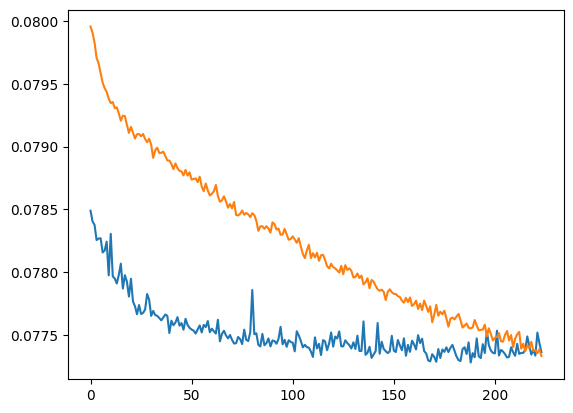

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['val_loss'][1:])
plt.plot(history.history['loss'][1:])

### lightgbm Model

In [17]:
import lightgbm as lgb
cf = lgb.LGBMRegressor(n_estimators=500)
cf.fit(dataset_train[feature_names].astype(float), dataset_train['rank'])

LGBMRegressor(n_estimators=500)

### Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

cf2 = RandomForestRegressor(n_estimators=100)
cf2.fit(dataset_train[feature_names].astype(float), dataset_train['rank'])

In [ ]:
feature_imp = pd.DataFrame(zip(cf.feature_importances_, feature_names), 
                           columns=['Value','Feature']).sort_values('Value', ascending=False)
feature_imp

%matplotlib inline
import seaborn as sns
sns.barplot(x="Value", y="Feature", data=feature_imp)

### Ensemble learning

In [ ]:
dataset_drop = dataset.dropna(subset=feature_names+['return'])

vals = model.predict(dataset_drop[feature_names].astype(float))
dataset_drop['result1'] = pd.Series(vals.swapaxes(0,1)[0], dataset_drop.index)

vals = cf.predict(dataset_drop[feature_names].astype(float))
dataset_drop['result2'] = pd.Series(vals, dataset_drop.index)

vals = cf2.predict(dataset_drop[feature_names].astype(float))
dataset_drop['result3'] = pd.Series(vals, dataset_drop.index)

dataset_drop = dataset_drop.reset_index().set_index("date")

# backtest

In [ ]:
import math


dates = sorted(list(set(dataset_drop.index)))

rs = []
for d in dates:
    
    dataset_time = dataset_drop.loc[d]
    
    dataset_time = drop_extreme_case(dataset_time, 
        ['bias60', 'bias120', 'bias240', 'mom1', 'mom2', 'mom3', 'mom4', 'mom5', 'mom6'], thresh=0.01)
    
    rank = dataset_time['result1'] + dataset_time['result2'] + dataset_time['result3'] 
    
    condition = (rank >= rank.nlargest(20).iloc[-1]) 
    r = dataset_time['return'][condition].mean()

    rs.append(r * (1-3/1000-1.425/1000*2*0.6))

rs = pd.Series(rs, index=dates)['2021':].cumprod()

s0050 = close['0050']['2021':]

pd.DataFrame({'nn strategy return':rs.reindex(s0050.index, method='ffill'), '0050 return':s0050/s0050[0]}).plot()



### 當月持股狀況

In [ ]:
dataset.index.levels[1]

In [ ]:
# get the latest dataset
last_date = "2022-09-10"#dataset.index.levels[1].max()
is_last_date = dataset.index.get_level_values('date') == last_date
last_dataset = dataset[is_last_date].copy()


last_dataset = drop_extreme_case(last_dataset, 
    ['bias60', 'bias120', 'bias240', 'mom1', 'mom2', 'mom3', 'mom4', 'mom5', 'mom6'], thresh=0.01)


# remove NaN testcases
last_dataset = last_dataset.dropna(subset=feature_names)

# predict

vals = model.predict(last_dataset[feature_names].astype(float))
last_dataset['result1'] = pd.Series(vals.swapaxes(0,1)[0], last_dataset.index)

vals = cf.predict(last_dataset[feature_names].astype(float))
last_dataset['result2'] = pd.Series(vals, last_dataset.index)

vals = cf2.predict(last_dataset[feature_names].astype(float))
last_dataset['result3'] = pd.Series(vals, last_dataset.index)

# calculate score

rank = last_dataset['result1'] + last_dataset['result2'] + last_dataset['result3']
condition = (rank >= rank.nlargest(20).iloc[-1]) 

# plot rank distribution
rank.hist(bins=20)


# show the best 20 stocks
slist1 = rank[condition].reset_index()['stock_id']



# 平均分配資產於股票之中

In [ ]:
close = data.get("收盤價")

money = 1000000
stock_prices = close[rank[condition].reset_index()['stock_id']].iloc[-1]


print("股票平分張數:")
money / len(stock_prices) / stock_prices / 1000


In [ ]:
import math

#新增本益比數據
pe = data.get("本益比")
pe=pe.reindex(every_month, method='ffill').fillna(method='ffill')#對應訓練資料集索引日期,fillna處理na數值

#date欄位
dates = sorted(list(set(dataset_test.index)))
rs = []
rs2 = []

for d in dates:
    dataset_time = dataset_test.loc[d]
    rank = dataset_time['result1'] + dataset_time['result2'] + dataset_time['result3']
    condition = (rank >= rank.nlargest(20).iloc[-1]) 
    r = dataset_time['return'][condition].mean()
    
    #有人想加pe濾網
    pe_s=pe.loc[d]#帶入日期到本益比資料
    dataset_time=dataset_time[condition].reset_index()
    dataset_time=dataset_time.set_index('stock_id')
    dataset_time['pe']=pe_s
    dataset_time['pe_rank'] = dataset_time['pe'].rank(pct=True)#增加本益比排行欄位(百分比模式)
    dataset_time=dataset_time[dataset_time['pe_rank']<0.7]#找低本益比的前50%
    r2 = dataset_time['return'].mean()#本益比濾網報酬率
    
    #算報酬率
    rs.append(r * (1-3/1000-1.425/1000*2*0.6))
    rs2.append(r2 * (1-3/1000-1.425/1000*2*0.6))

rs = pd.Series(rs, index=dates).cumprod()
rs2 = pd.Series(rs2, index=dates).cumprod()

s0050 = close['0050']['2016':]

#繪圖
plt.rcParams["figure.figsize"] = (12,8)
pd.DataFrame({'nn strategy return':rs.reindex(s0050.index, method='ffill'), 
              'Include PE strategy return':rs2.reindex(s0050.index, method='ffill'), 
              '0050 return':s0050/s0050[0]}).plot()
